In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# 读取数据

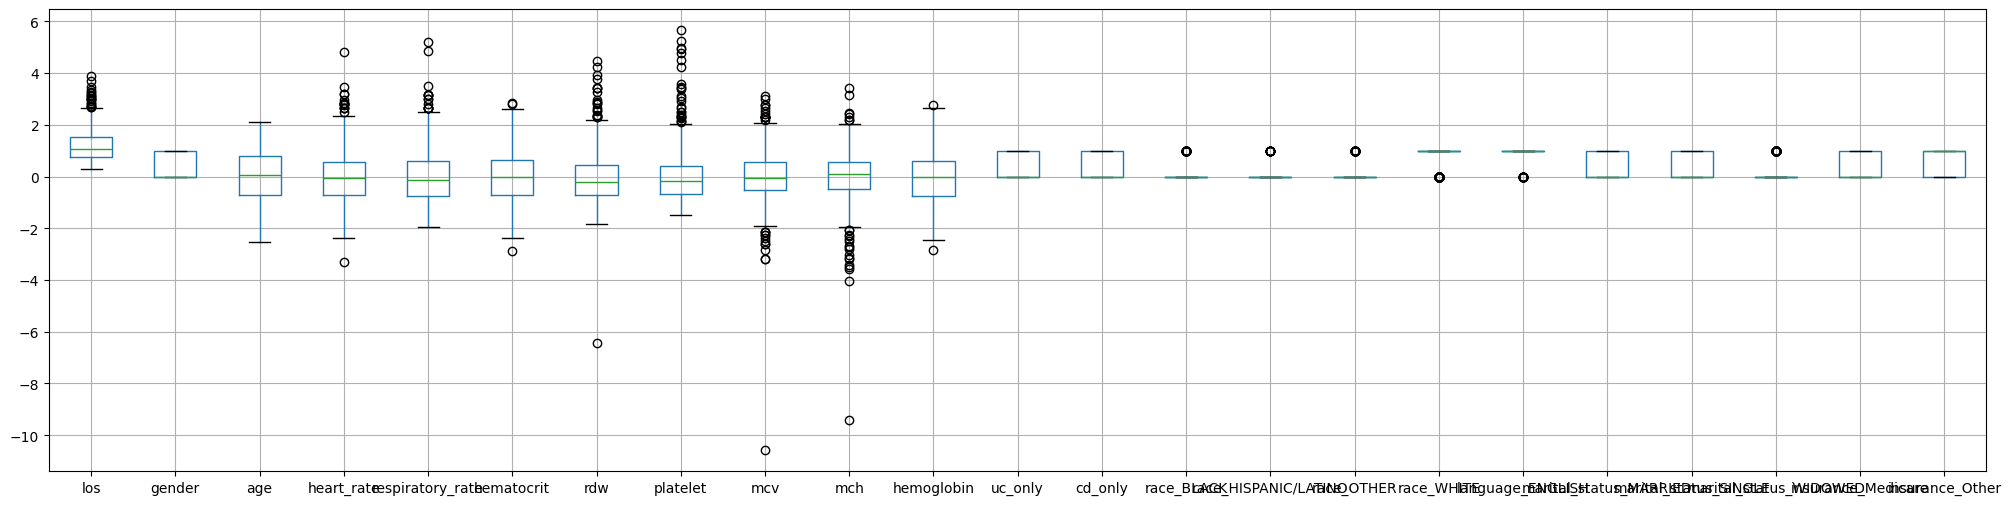

In [20]:
data = pd.read_csv('./data_processed/data_norm_log.csv', index_col=0)

plt.figure(figsize=(25, 6))
data.boxplot()
plt.show()

In [18]:
data.describe()

,los,gender,age,heart_rate,respiratory_rate,hematocrit,rdw,platelet,mcv,mch,...,race_BLACK,race_HISPANIC/LATINO,race_OTHER,race_WHITE,language_ENGLISH,marital_status_MARRIED,marital_status_SINGLE,marital_status_WIDOWED,insurance_Medicare,insurance_Other
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,651.000000,652.000000,652.000000,...,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,1.216854,0.480061,0.545993,0.404975,0.271034,0.502072,0.590456,0.208523,0.771952,0.733008,...,0.069018,0.023006,0.081288,0.819018,0.955521,0.464724,0.326687,0.121166,0.440184,0.501534
std,0.606894,0.499986,0.215068,0.123228,0.140274,0.174386,0.091914,0.139935,0.073038,0.077810,...,0.253680,0.150038,0.273487,0.385299,0.206314,0.499137,0.469362,0.326570,0.496790,0.500382
min,0.276219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.762176,0.000000,0.393190,0.318750,0.166667,0.374631,0.526515,0.114324,0.735043,0.695332,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.068668,0.000000,0.555374,0.396875,0.250000,0.500000,0.571970,0.185053,0.769231,0.739558,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.518842,1.000000,0.717939,0.475000,0.357143,0.613569,0.632576,0.265569,0.811966,0.776413,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,3.869370,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 检验 los 是否为正态

## Box-Cox

In [9]:
data_ = data.copy()

data_['los'], fitted_lambda = stats.boxcox(data['los'])

print(f"找到的lambda值: {fitted_lambda}")

找到的lambda值: -0.2827695959609285


In [4]:
stat, p = stats.normaltest(data_['los'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# 解读结果
if p > 0.05:
    print('样本看起来是正态分布的')
else:
    print('样本看起来不是正态分布的')

Statistics=1.268, p=0.531
样本看起来是正态分布的


# 组间差异

In [5]:
x1 = data[data['uc_only'] == 1]['los']
x2 = data[data['cd_only'] == 1]['los']

x1 = np.array(x1)
x2 = np.array(x2)


## U检验

In [6]:
u_statistic, p_value = stats.mannwhitneyu(x1, x2, alternative='two-sided')

print(f"U统计量: {u_statistic}")
print(f"P值: {p_value}")

# 根据P值判断显著性
if p_value < 0.05:
    print("两组数据的中位数存在显著差异。")
else:
    print("两组数据的中位数不存在显著差异。")


U统计量: 44260.0
P值: 0.1193678776009166
两组数据的中位数不存在显著差异。


## t 检验

In [7]:
# 进行独立样本t检验
t_statistic, p_value = stats.ttest_ind(x1, x2, equal_var=False)

print(f"t统计量: {t_statistic}")
print(f"P值: {p_value}")

# 根据P值判断显著性
if p_value < 0.05:
    print("两组数据的均值存在显著差异。")
else:
    print("两组数据的均值不存在显著差异。")


t统计量: 0.17597652267980374
P值: 0.8603730736172386
两组数据的均值不存在显著差异。


In [32]:
pd.pivot_table(
    data=data,
    values='los',
    index=['uc_only', 'cd_only'],
    columns='gender',
    aggfunc=['mean', 'std', 'count']
).reset_index()

uc_only cd_only      mean                 std           count     
gender                         0         1         0         1     0    1
0            0       0  3.785936  1.926811  3.585054  1.089389    20   14
1            0       1  3.318524  3.220325  3.839162  3.717169   163  139
2            1       0  3.500538  3.174740  5.240216  4.683568   156  160

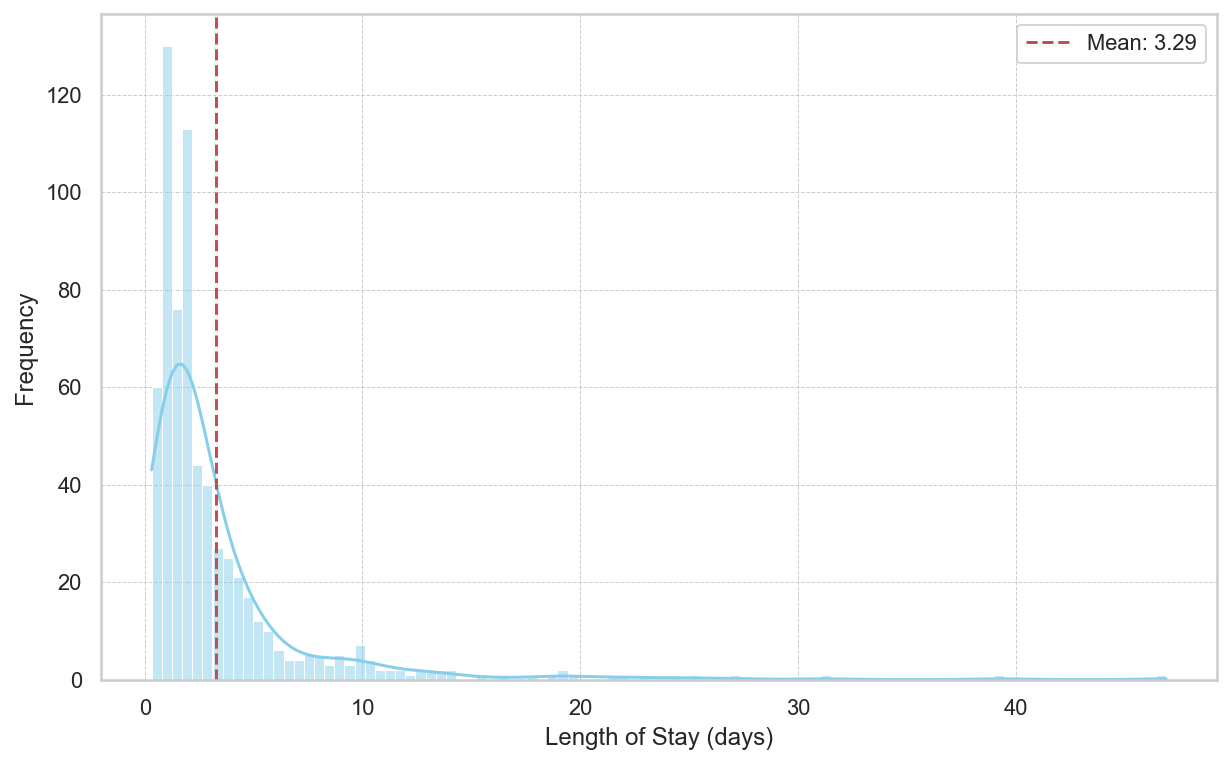

In [31]:
data = pd.read_csv('./data_processed/data.csv', index_col=0)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6), dpi=144)

sns.histplot(data.loc[:, 'los'], bins=100, color="navy", kde=True)

# 在直方图上添加均值线
mean_val = data['los'].mean()
plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')

# 添加网格线以提高可读性
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.xlabel('Length of Stay (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.legend()
# 显示图表
plt.show()

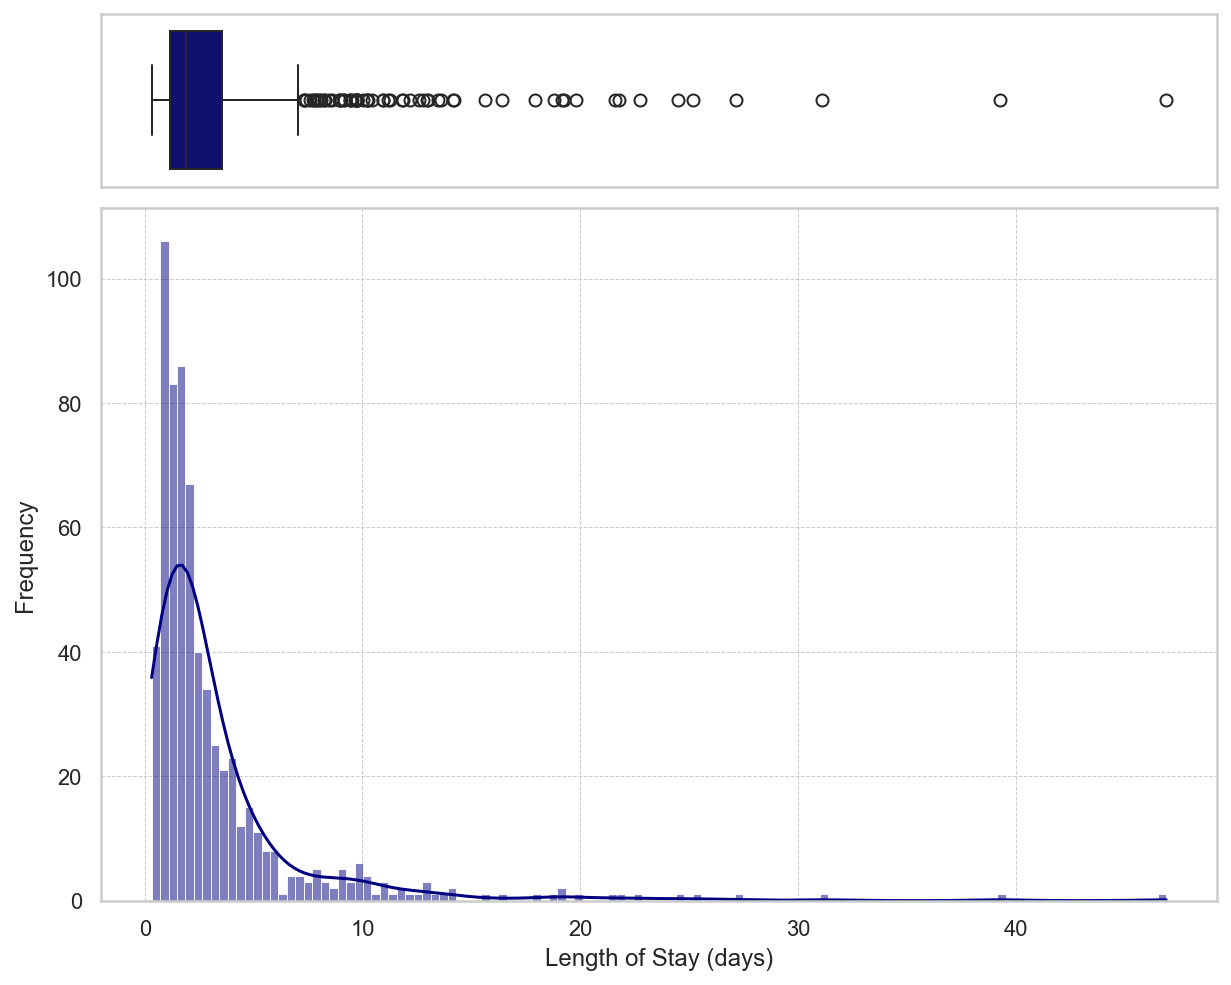

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./data_processed/data.csv', index_col=0)

# 设置seaborn主题
sns.set_theme(style="whitegrid")

# 创建一个图形和两个子图（axes），其中一个用于直方图，另一个用于箱线图
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=144, gridspec_kw={'height_ratios': [1, 4]})

# 绘制箱线图在上方的子图
sns.boxplot(x=data['los'], ax=ax[0], color="navy")
ax[0].set(xlabel='')  # 移除箱线图的x轴标签
ax[0].xaxis.tick_top()  # 将箱线图的x轴刻度移至顶部
ax[0].set_xticks([])  # 移除箱线图的x轴刻度值

# 绘制直方图在下方的子图
sns.histplot(data.loc[:, 'los'], bins=120, kde=True, ax=ax[1], color="navy")

# 在直方图上添加均值线
# mean_val = data['los'].mean()
# ax[1].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')

# 设置直方图的标签和网格线
ax[1].set_xlabel('Length of Stay (days)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].grid(True, which="both", ls="--", linewidth=0.5)
# ax[1].legend()

# 调整子图之间的间距
plt.subplots_adjust(hspace=0.05)  # 调整子图之间的垂直间距

# 显示图表
plt.show()


In [52]:
np.median(data['los'])

1.9115

In [49]:
bins=[0, 3.29, np.max(data['los'])]

hist, bin_edges = np.histogram(data['los'], bins=bins)

In [50]:
hist

array([473, 179], dtype=int64)

In [42]:
np.mean(data['los']), np.median(data['los'])

(3.290308378834356, 1.9115)